<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mal-eine-interessante-Zeitreihe-erzeugen" data-toc-modified-id="Mal-eine-interessante-Zeitreihe-erzeugen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mal eine interessante Zeitreihe erzeugen</a></span></li><li><span><a href="#Trainings--und-Testdaten-vorbereiten" data-toc-modified-id="Trainings--und-Testdaten-vorbereiten-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trainings- und Testdaten vorbereiten</a></span></li><li><span><a href="#Ein-MLP-erzeugen-und-mit-den-Trainingsdaten-trainieren" data-toc-modified-id="Ein-MLP-erzeugen-und-mit-den-Trainingsdaten-trainieren-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ein MLP erzeugen und mit den Trainingsdaten trainieren</a></span></li><li><span><a href="#MLP-testen" data-toc-modified-id="MLP-testen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MLP testen</a></span></li></ul></div>

# Mal eine interessante Zeitreihe erzeugen

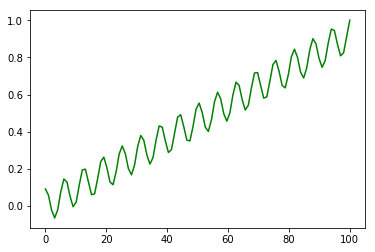

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Länge der Zeitreihe?
N = 100

x = np.linspace(0,100,N)
zr = np.cos(x) + x/10

zr /= zr.max()

plt.plot(x,zr, linestyle="-", color="green")
plt.show()

Wir haben eine systematische Kurve erzeugt: es gibt einen globalen linearen Trend und ein periodisches Verhalten.

# Trainings- und Testdaten vorbereiten

In [25]:
# Probieren Sie die Inputfenstergöße
# mal mit 3, mal mit 6!
input_window_size = 6

M = N-input_window_size

# z.B. Fenstergröße: 3
#      Länge der Zeitreihe N = 10
#      dann ist M=10-3=7

DX = np.zeros( (M, input_window_size) )
DY = np.zeros( (M, 1) )

print("DX.shape=",DX.shape)
print("DY.shape=",DY.shape)

for i in range(0,M):
    x = zr[i:i+input_window_size]
    y = [ zr[i+input_window_size] ]
    print(x, "-->", y)
        
    DX[i,:] = x
    DY[i,:] = y

#print(DX)
#print(DY)

train_X = DX[0:N//2,:]
test_X  = DX[N//2:,:]

train_Y = DY[0:N//2,:]
test_Y  = DY[N//2:,:]

print("train_X.shape",train_X.shape)
print("test_X.shape", test_X.shape)

print("train_X:\n",train_X)
print("train_Y:\n",train_Y)

DX.shape= (94, 6)
DY.shape= (94, 1)
[ 0.09206137  0.05825508 -0.02139599 -0.06359447 -0.02011543  0.07703336] --> [0.14558511497566515]
[ 0.05825508 -0.02139599 -0.06359447 -0.02011543  0.07703336  0.14558511] --> [0.13005273547311291]
[-0.02139599 -0.06359447 -0.02011543  0.07703336  0.14558511  0.13005274] --> [0.053689678632763374]
[-0.06359447 -0.02011543  0.07703336  0.14558511  0.13005274  0.05368968] --> [-0.0032857327642234159]
[-0.02011543  0.07703336  0.14558511  0.13005274  0.05368968 -0.00328573] --> [0.021189270470958005]
[ 0.07703336  0.14558511  0.13005274  0.05368968 -0.00328573  0.02118927] --> [0.11290324608179877]
[ 0.14558511  0.13005274  0.05368968 -0.00328573  0.02118927  0.11290325] --> [0.19467884034887653]
[ 0.13005274  0.05368968 -0.00328573  0.02118927  0.11290325  0.19467884] --> [0.19864549318250929]
[ 0.05368968 -0.00328573  0.02118927  0.11290325  0.19467884  0.19864549] --> [0.129796799672978]
[-0.00328573  0.02118927  0.11290325  0.19467884  0.19864549 

# Ein MLP erzeugen und mit den Trainingsdaten trainieren

In [26]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense
from keras import optimizers


In [27]:
model = Sequential()
model.add(Dense(20, activation="relu", input_dim=input_window_size))
model.add(Dense(1, activation="linear"))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mean_squared_error', optimizer="sgd")

In [30]:
model.fit(train_X,train_Y, epochs=2000)

Epoch 1/2000
50/50 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 2/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0352
Epoch 3/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0306
Epoch 4/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0267
Epoch 5/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0235
Epoch 6/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0206
Epoch 7/2000
50/50 [==============================] - 0s 100us/step - loss: 0.0182
Epoch 8/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0161
Epoch 9/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0143
Epoch 10/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0127
Epoch 11/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0114
Epoch 12/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0103
Epoch 13/2000

Epoch 99/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0027
Epoch 100/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0027
Epoch 101/2000
50/50 [==============================] - ETA: 0s - loss: 0.002 - 0s 70us/step - loss: 0.0027
Epoch 102/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0027
Epoch 103/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0027
Epoch 104/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0027
Epoch 105/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0026
Epoch 106/2000
50/50 [==============================] - ETA: 0s - loss: 0.002 - 0s 80us/step - loss: 0.0026
Epoch 107/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0026
Epoch 108/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0026
Epoch 109/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0026
Epoch 110/2000
50/50 [=======

50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 196/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 197/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0018
Epoch 198/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 199/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 200/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 201/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 202/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 203/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 204/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 205/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 206/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0018
Epoch 2

Epoch 292/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0014
Epoch 293/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0014
Epoch 294/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0014
Epoch 295/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0014
Epoch 296/2000
50/50 [==============================] - 0s 100us/step - loss: 0.0014
Epoch 297/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0014
Epoch 298/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0014
Epoch 299/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0014
Epoch 300/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0013
Epoch 301/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0013
Epoch 302/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0013
Epoch 303/2000
50/50 [==============================] - 0s 90us/step - loss

50/50 [==============================] - 0s 80us/step - loss: 0.0011
Epoch 390/2000
50/50 [==============================] - 0s 80us/step - loss: 0.0011
Epoch 391/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 392/2000
50/50 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 393/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 394/2000
50/50 [==============================] - 0s 90us/step - loss: 0.0011
Epoch 395/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0011
Epoch 396/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 397/2000
50/50 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 398/2000
50/50 [==============================] - 0s 110us/step - loss: 0.0011
Epoch 399/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0011
Epoch 400/2000
50/50 [==============================] - 0s 70us/step - loss: 0.0011
Epoch 

50/50 [==============================] - 0s 60us/step - loss: 9.1625e-04
Epoch 484/2000
50/50 [==============================] - 0s 70us/step - loss: 9.1457e-04
Epoch 485/2000
50/50 [==============================] - 0s 90us/step - loss: 9.1293e-04
Epoch 486/2000
50/50 [==============================] - 0s 90us/step - loss: 9.1256e-04
Epoch 487/2000
50/50 [==============================] - 0s 90us/step - loss: 9.0952e-04
Epoch 488/2000
50/50 [==============================] - 0s 70us/step - loss: 9.0800e-04
Epoch 489/2000
50/50 [==============================] - 0s 80us/step - loss: 9.0608e-04
Epoch 490/2000
50/50 [==============================] - 0s 60us/step - loss: 9.0435e-04
Epoch 491/2000
50/50 [==============================] - 0s 60us/step - loss: 9.0276e-04
Epoch 492/2000
50/50 [==============================] - 0s 60us/step - loss: 9.0247e-04
Epoch 493/2000
50/50 [==============================] - 0s 70us/step - loss: 8.9993e-04
Epoch 494/2000
50/50 [=========================

50/50 [==============================] - 0s 140us/step - loss: 7.8371e-04
Epoch 575/2000
50/50 [==============================] - 0s 120us/step - loss: 7.8172e-04
Epoch 576/2000
50/50 [==============================] - 0s 160us/step - loss: 7.8047e-04
Epoch 577/2000
50/50 [==============================] - 0s 90us/step - loss: 7.7963e-04
Epoch 578/2000
50/50 [==============================] - 0s 110us/step - loss: 7.7855e-04
Epoch 579/2000
50/50 [==============================] - 0s 90us/step - loss: 7.7734e-04
Epoch 580/2000
50/50 [==============================] - 0s 80us/step - loss: 7.7563e-04
Epoch 581/2000
50/50 [==============================] - 0s 160us/step - loss: 7.7455e-04
Epoch 582/2000
50/50 [==============================] - 0s 100us/step - loss: 7.7406e-04
Epoch 583/2000
50/50 [==============================] - 0s 190us/step - loss: 7.7188e-04
Epoch 584/2000
50/50 [==============================] - 0s 150us/step - loss: 7.7101e-04
Epoch 585/2000
50/50 [=================

50/50 [==============================] - 0s 90us/step - loss: 6.7718e-04
Epoch 666/2000
50/50 [==============================] - ETA: 0s - loss: 7.5662e-0 - 0s 110us/step - loss: 6.7541e-04
Epoch 667/2000
50/50 [==============================] - 0s 90us/step - loss: 6.7430e-04
Epoch 668/2000
50/50 [==============================] - 0s 100us/step - loss: 6.7326e-04
Epoch 669/2000
50/50 [==============================] - 0s 90us/step - loss: 6.7215e-04
Epoch 670/2000
50/50 [==============================] - 0s 90us/step - loss: 6.7097e-04
Epoch 671/2000
50/50 [==============================] - 0s 80us/step - loss: 6.7021e-04
Epoch 672/2000
50/50 [==============================] - 0s 90us/step - loss: 6.7148e-04
Epoch 673/2000
50/50 [==============================] - 0s 100us/step - loss: 6.6793e-04
Epoch 674/2000
50/50 [==============================] - 0s 70us/step - loss: 6.6675e-04
Epoch 675/2000
50/50 [==============================] - 0s 60us/step - loss: 6.6844e-04
Epoch 676/2000
5

50/50 [==============================] - 0s 70us/step - loss: 5.8608e-04
Epoch 758/2000
50/50 [==============================] - 0s 80us/step - loss: 5.8544e-04
Epoch 759/2000
50/50 [==============================] - 0s 90us/step - loss: 5.8500e-04
Epoch 760/2000
50/50 [==============================] - 0s 70us/step - loss: 5.8383e-04
Epoch 761/2000
50/50 [==============================] - 0s 70us/step - loss: 5.8263e-04
Epoch 762/2000
50/50 [==============================] - 0s 90us/step - loss: 5.8162e-04
Epoch 763/2000
50/50 [==============================] - 0s 60us/step - loss: 5.8104e-04
Epoch 764/2000
50/50 [==============================] - 0s 70us/step - loss: 5.7984e-04
Epoch 765/2000
50/50 [==============================] - 0s 80us/step - loss: 5.7899e-04
Epoch 766/2000
50/50 [==============================] - 0s 70us/step - loss: 5.7853e-04
Epoch 767/2000
50/50 [==============================] - 0s 70us/step - loss: 5.7725e-04
Epoch 768/2000
50/50 [=========================

50/50 [==============================] - 0s 60us/step - loss: 5.0980e-04
Epoch 850/2000
50/50 [==============================] - 0s 60us/step - loss: 5.0979e-04
Epoch 851/2000
50/50 [==============================] - 0s 70us/step - loss: 5.0842e-04
Epoch 852/2000
50/50 [==============================] - 0s 70us/step - loss: 5.0787e-04
Epoch 853/2000
50/50 [==============================] - 0s 70us/step - loss: 5.0927e-04
Epoch 854/2000
50/50 [==============================] - 0s 100us/step - loss: 5.0671e-04
Epoch 855/2000
50/50 [==============================] - 0s 70us/step - loss: 5.0553e-04
Epoch 856/2000
50/50 [==============================] - 0s 60us/step - loss: 5.0473e-04
Epoch 857/2000
50/50 [==============================] - 0s 100us/step - loss: 5.0387e-04
Epoch 858/2000
50/50 [==============================] - 0s 130us/step - loss: 5.0304e-04
Epoch 859/2000
50/50 [==============================] - 0s 80us/step - loss: 5.0226e-04
Epoch 860/2000
50/50 [======================

50/50 [==============================] - 0s 60us/step - loss: 4.4492e-04
Epoch 942/2000
50/50 [==============================] - 0s 80us/step - loss: 4.4372e-04
Epoch 943/2000
50/50 [==============================] - 0s 80us/step - loss: 4.4308e-04
Epoch 944/2000
50/50 [==============================] - 0s 70us/step - loss: 4.4246e-04
Epoch 945/2000
50/50 [==============================] - 0s 70us/step - loss: 4.4214e-04
Epoch 946/2000
50/50 [==============================] - 0s 90us/step - loss: 4.4112e-04
Epoch 947/2000
50/50 [==============================] - 0s 80us/step - loss: 4.4095e-04
Epoch 948/2000
50/50 [==============================] - 0s 60us/step - loss: 4.4013e-04
Epoch 949/2000
50/50 [==============================] - 0s 120us/step - loss: 4.3943e-04
Epoch 950/2000
50/50 [==============================] - 0s 100us/step - loss: 4.3906e-04
Epoch 951/2000
50/50 [==============================] - 0s 60us/step - loss: 4.3793e-04
Epoch 952/2000
50/50 [=======================

50/50 [==============================] - 0s 80us/step - loss: 3.8782e-04
Epoch 1034/2000
50/50 [==============================] - 0s 60us/step - loss: 3.8792e-04
Epoch 1035/2000
50/50 [==============================] - 0s 70us/step - loss: 3.8682e-04
Epoch 1036/2000
50/50 [==============================] - 0s 80us/step - loss: 3.8617e-04
Epoch 1037/2000
50/50 [==============================] - 0s 90us/step - loss: 3.8551e-04
Epoch 1038/2000
50/50 [==============================] - 0s 70us/step - loss: 3.8582e-04
Epoch 1039/2000
50/50 [==============================] - 0s 60us/step - loss: 3.8468e-04
Epoch 1040/2000
50/50 [==============================] - 0s 80us/step - loss: 3.8403e-04
Epoch 1041/2000
50/50 [==============================] - 0s 80us/step - loss: 3.8337e-04
Epoch 1042/2000
50/50 [==============================] - 0s 70us/step - loss: 3.8267e-04
Epoch 1043/2000
50/50 [==============================] - 0s 80us/step - loss: 3.8275e-04
Epoch 1044/2000
50/50 [==============

50/50 [==============================] - 0s 70us/step - loss: 3.3916e-04
Epoch 1125/2000
50/50 [==============================] - 0s 60us/step - loss: 3.3903e-04
Epoch 1126/2000
50/50 [==============================] - 0s 80us/step - loss: 3.3816e-04
Epoch 1127/2000
50/50 [==============================] - 0s 60us/step - loss: 3.3770e-04
Epoch 1128/2000
50/50 [==============================] - 0s 110us/step - loss: 3.3786e-04
Epoch 1129/2000
50/50 [==============================] - 0s 70us/step - loss: 3.3675e-04
Epoch 1130/2000
50/50 [==============================] - 0s 70us/step - loss: 3.3626e-04
Epoch 1131/2000
50/50 [==============================] - 0s 70us/step - loss: 3.3627e-04
Epoch 1132/2000
50/50 [==============================] - 0s 70us/step - loss: 3.3521e-04
Epoch 1133/2000
50/50 [==============================] - 0s 60us/step - loss: 3.3505e-04
Epoch 1134/2000
50/50 [==============================] - 0s 80us/step - loss: 3.3457e-04
Epoch 1135/2000
50/50 [=============

50/50 [==============================] - 0s 100us/step - loss: 2.9810e-04
Epoch 1216/2000
50/50 [==============================] - 0s 140us/step - loss: 2.9694e-04
Epoch 1217/2000
50/50 [==============================] - 0s 150us/step - loss: 2.9663e-04
Epoch 1218/2000
50/50 [==============================] - 0s 130us/step - loss: 2.9630e-04
Epoch 1219/2000
50/50 [==============================] - 0s 100us/step - loss: 2.9587e-04
Epoch 1220/2000
50/50 [==============================] - 0s 170us/step - loss: 2.9576e-04
Epoch 1221/2000
50/50 [==============================] - 0s 110us/step - loss: 2.9493e-04
Epoch 1222/2000
50/50 [==============================] - 0s 120us/step - loss: 2.9442e-04
Epoch 1223/2000
50/50 [==============================] - 0s 120us/step - loss: 2.9477e-04
Epoch 1224/2000
50/50 [==============================] - 0s 150us/step - loss: 2.9398e-04
Epoch 1225/2000
50/50 [==============================] - 0s 90us/step - loss: 2.9301e-04
Epoch 1226/2000
50/50 [====

50/50 [==============================] - 0s 100us/step - loss: 2.6132e-04
Epoch 1306/2000
50/50 [==============================] - 0s 120us/step - loss: 2.6213e-04
Epoch 1307/2000
50/50 [==============================] - 0s 80us/step - loss: 2.6037e-04
Epoch 1308/2000
50/50 [==============================] - 0s 100us/step - loss: 2.6004e-04
Epoch 1309/2000
50/50 [==============================] - 0s 100us/step - loss: 2.5973e-04
Epoch 1310/2000
50/50 [==============================] - 0s 100us/step - loss: 2.5937e-04
Epoch 1311/2000
50/50 [==============================] - 0s 70us/step - loss: 2.5949e-04
Epoch 1312/2000
50/50 [==============================] - 0s 90us/step - loss: 2.5852e-04
Epoch 1313/2000
50/50 [==============================] - 0s 90us/step - loss: 2.5857e-04
Epoch 1314/2000
50/50 [==============================] - 0s 60us/step - loss: 2.5770e-04
Epoch 1315/2000
50/50 [==============================] - 0s 80us/step - loss: 2.5739e-04
Epoch 1316/2000
50/50 [=========

50/50 [==============================] - 0s 130us/step - loss: 2.2902e-04
Epoch 1397/2000
50/50 [==============================] - 0s 80us/step - loss: 2.2870e-04
Epoch 1398/2000
50/50 [==============================] - 0s 120us/step - loss: 2.2857e-04
Epoch 1399/2000
50/50 [==============================] - 0s 80us/step - loss: 2.2804e-04
Epoch 1400/2000
50/50 [==============================] - 0s 120us/step - loss: 2.2770e-04
Epoch 1401/2000
50/50 [==============================] - 0s 90us/step - loss: 2.2747e-04
Epoch 1402/2000
50/50 [==============================] - 0s 140us/step - loss: 2.2701e-04
Epoch 1403/2000
50/50 [==============================] - 0s 110us/step - loss: 2.2687e-04
Epoch 1404/2000
50/50 [==============================] - 0s 90us/step - loss: 2.2634e-04
Epoch 1405/2000
50/50 [==============================] - 0s 70us/step - loss: 2.2601e-04
Epoch 1406/2000
50/50 [==============================] - 0s 90us/step - loss: 2.2570e-04
Epoch 1407/2000
50/50 [=========

50/50 [==============================] - 0s 70us/step - loss: 2.0130e-04
Epoch 1488/2000
50/50 [==============================] - 0s 70us/step - loss: 2.0089e-04
Epoch 1489/2000
50/50 [==============================] - 0s 60us/step - loss: 2.0056e-04
Epoch 1490/2000
50/50 [==============================] - 0s 80us/step - loss: 2.0020e-04
Epoch 1491/2000
50/50 [==============================] - 0s 60us/step - loss: 1.9994e-04
Epoch 1492/2000
50/50 [==============================] - 0s 90us/step - loss: 1.9961e-04
Epoch 1493/2000
50/50 [==============================] - 0s 70us/step - loss: 1.9932e-04
Epoch 1494/2000
50/50 [==============================] - 0s 70us/step - loss: 1.9907e-04
Epoch 1495/2000
50/50 [==============================] - 0s 50us/step - loss: 1.9882e-04
Epoch 1496/2000
50/50 [==============================] - 0s 110us/step - loss: 1.9859e-04
Epoch 1497/2000
50/50 [==============================] - 0s 80us/step - loss: 1.9834e-04
Epoch 1498/2000
50/50 [=============

50/50 [==============================] - 0s 70us/step - loss: 1.7667e-04
Epoch 1580/2000
50/50 [==============================] - 0s 70us/step - loss: 1.7643e-04
Epoch 1581/2000
50/50 [==============================] - 0s 60us/step - loss: 1.7643e-04
Epoch 1582/2000
50/50 [==============================] - 0s 60us/step - loss: 1.7589e-04
Epoch 1583/2000
50/50 [==============================] - 0s 90us/step - loss: 1.7620e-04
Epoch 1584/2000
50/50 [==============================] - 0s 70us/step - loss: 1.7539e-04
Epoch 1585/2000
50/50 [==============================] - 0s 60us/step - loss: 1.7522e-04
Epoch 1586/2000
50/50 [==============================] - 0s 50us/step - loss: 1.7495e-04
Epoch 1587/2000
50/50 [==============================] - 0s 90us/step - loss: 1.7471e-04
Epoch 1588/2000
50/50 [==============================] - 0s 80us/step - loss: 1.7444e-04
Epoch 1589/2000
50/50 [==============================] - 0s 60us/step - loss: 1.7458e-04
Epoch 1590/2000
50/50 [==============

50/50 [==============================] - 0s 100us/step - loss: 1.5583e-04
Epoch 1671/2000
50/50 [==============================] - 0s 90us/step - loss: 1.5553e-04
Epoch 1672/2000
50/50 [==============================] - 0s 120us/step - loss: 1.5558e-04
Epoch 1673/2000
50/50 [==============================] - 0s 70us/step - loss: 1.5514e-04
Epoch 1674/2000
50/50 [==============================] - 0s 150us/step - loss: 1.5509e-04
Epoch 1675/2000
50/50 [==============================] - 0s 90us/step - loss: 1.5470e-04
Epoch 1676/2000
50/50 [==============================] - 0s 90us/step - loss: 1.5450e-04
Epoch 1677/2000
50/50 [==============================] - 0s 130us/step - loss: 1.5452e-04
Epoch 1678/2000
50/50 [==============================] - 0s 110us/step - loss: 1.5410e-04
Epoch 1679/2000
50/50 [==============================] - 0s 110us/step - loss: 1.5453e-04
Epoch 1680/2000
50/50 [==============================] - 0s 100us/step - loss: 1.5366e-04
Epoch 1681/2000
50/50 [=======

Epoch 1762/2000
50/50 [==============================] - 0s 60us/step - loss: 1.3728e-04
Epoch 1763/2000
50/50 [==============================] - 0s 100us/step - loss: 1.3716e-04
Epoch 1764/2000
50/50 [==============================] - 0s 100us/step - loss: 1.3706e-04
Epoch 1765/2000
50/50 [==============================] - 0s 70us/step - loss: 1.3671e-04
Epoch 1766/2000
50/50 [==============================] - 0s 110us/step - loss: 1.3646e-04
Epoch 1767/2000
50/50 [==============================] - 0s 90us/step - loss: 1.3626e-04
Epoch 1768/2000
50/50 [==============================] - 0s 100us/step - loss: 1.3608e-04
Epoch 1769/2000
50/50 [==============================] - 0s 90us/step - loss: 1.3589e-04
Epoch 1770/2000
50/50 [==============================] - 0s 70us/step - loss: 1.3573e-04
Epoch 1771/2000
50/50 [==============================] - 0s 60us/step - loss: 1.3560e-04
Epoch 1772/2000
50/50 [==============================] - 0s 80us/step - loss: 1.3547e-04
Epoch 1773/2000
5

50/50 [==============================] - 0s 60us/step - loss: 1.2133e-04
Epoch 1854/2000
50/50 [==============================] - 0s 60us/step - loss: 1.2126e-04
Epoch 1855/2000
50/50 [==============================] - 0s 70us/step - loss: 1.2084e-04
Epoch 1856/2000
50/50 [==============================] - 0s 100us/step - loss: 1.2069e-04
Epoch 1857/2000
50/50 [==============================] - 0s 50us/step - loss: 1.2069e-04
Epoch 1858/2000
50/50 [==============================] - 0s 80us/step - loss: 1.2051e-04
Epoch 1859/2000
50/50 [==============================] - 0s 70us/step - loss: 1.2041e-04
Epoch 1860/2000
50/50 [==============================] - 0s 60us/step - loss: 1.2016e-04
Epoch 1861/2000
50/50 [==============================] - 0s 60us/step - loss: 1.1989e-04
Epoch 1862/2000
50/50 [==============================] - ETA: 0s - loss: 1.2077e-0 - 0s 80us/step - loss: 1.1973e-04
Epoch 1863/2000
50/50 [==============================] - 0s 70us/step - loss: 1.1956e-04
Epoch 18

50/50 [==============================] - 0s 70us/step - loss: 1.0726e-04
Epoch 1945/2000
50/50 [==============================] - 0s 70us/step - loss: 1.0707e-04
Epoch 1946/2000
50/50 [==============================] - 0s 70us/step - loss: 1.0695e-04
Epoch 1947/2000
50/50 [==============================] - 0s 80us/step - loss: 1.0702e-04
Epoch 1948/2000
50/50 [==============================] - 0s 60us/step - loss: 1.0665e-04
Epoch 1949/2000
50/50 [==============================] - 0s 80us/step - loss: 1.0654e-04
Epoch 1950/2000
50/50 [==============================] - 0s 70us/step - loss: 1.0642e-04
Epoch 1951/2000
50/50 [==============================] - 0s 80us/step - loss: 1.0619e-04
Epoch 1952/2000
50/50 [==============================] - 0s 70us/step - loss: 1.0603e-04
Epoch 1953/2000
50/50 [==============================] - 0s 80us/step - loss: 1.0589e-04
Epoch 1954/2000
50/50 [==============================] - 0s 60us/step - loss: 1.0579e-04
Epoch 1955/2000
50/50 [==============

# MLP testen

In [31]:
predvalues = model.predict(test_X)

In [32]:
predvalues.shape

(44, 1)

In [33]:
predvalues[:10]

array([[ 0.59917259],
       [ 0.56696129],
       [ 0.5010184 ],
       [ 0.47179735],
       [ 0.51536381],
       [ 0.59776562],
       [ 0.6543687 ],
       [ 0.63703901],
       [ 0.57256216],
       [ 0.53001916]], dtype=float32)

In [34]:
test_Y[:10]

array([[ 0.6127993 ],
       [ 0.57767475],
       [ 0.49795234],
       [ 0.45699625],
       [ 0.50186797],
       [ 0.59925555],
       [ 0.6666686 ],
       [ 0.64968635],
       [ 0.57292   ],
       [ 0.51696552]])

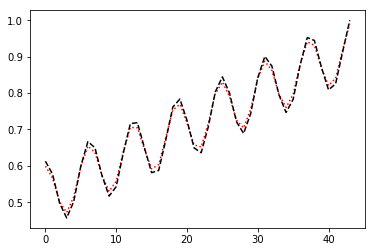

In [35]:
plt.plot(predvalues, label="predicted", linestyle=":", color="red")
plt.plot(test_Y, label="ground truth", linestyle="--", color="black")
plt.show()